#### Required Files

https://dosya.co/l51mphgw7vr8/YOLO.rar.html


In [35]:
import cv2
import numpy as np
from yolo_model import YOLO
import matplotlib.pyplot as plt


In [36]:
yolo = YOLO(0.6, 0.5)
file = "data/coco_classes.txt"

In [37]:
with open(file) as f:
    class_name = f.readlines()
    
all_classes = [c.strip() for c in class_name]

f = "dog_cat.jpg"
path = "images/"+f
image = cv2.imread(path)
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
pimage = cv2.resize(image,(416,416))
pimage = np.array(pimage, dtype = "float32")
pimage /= 255.0
pimage = np.expand_dims(pimage, axis = 0)


In [39]:
#yolo
boxes, classes, scores = yolo.predict(pimage, image.shape)

for box, score, cl in zip(boxes,scores,classes):
    
    x,y,w,h = box
    
    top = max(0, np.floor(x+0.5).astype(int))
    left = max(0, np.floor(y+0.5).astype(int))
    right = max(0, np.floor(x+w++0.5).astype(int))
    bottom = max(0, np.floor(y+h+0.5).astype(int))
    
    cv2.rectangle(image, (top,left), (right,bottom), (255,0,0),2)
    cv2.putText(image,f"{all_classes[cl]} {score}", (top,left-6), cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),1,cv2.LINE_AA)
    
cv2.imshow("yolo",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(<Figure size 1080x1080 with 1 Axes>,
 (-0.5, 1667.5, 937.5, -0.5))

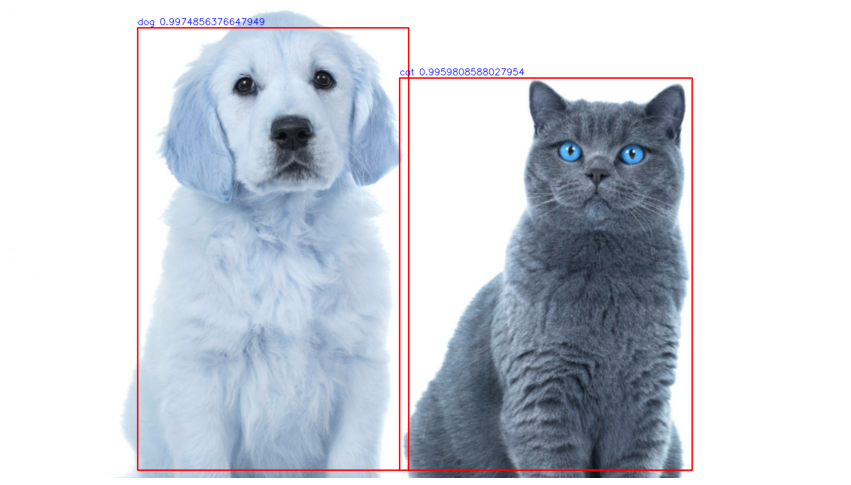

In [34]:
plt.figure(figsize=(15,15)),plt.imshow(image,cmap="gray"),plt.axis("off")